### 파일불러오기 및 병합

In [1]:
import pandas as pd

In [46]:
df2021_sum = df2021.drop(columns=['노선번호', '노선명','역명','승차총승객수', '등록일자'])

In [47]:
df2021_sum=df2021_sum.groupby(['사용일자', '버스정류장ARS번호'])['하차총승객수'].sum().reset_index()

In [167]:
df2018_sum

,사용일자,버스정류장ARS번호,하차총승객수
0,20180101,01001,159
1,20180101,01002,623
2,20180101,01003,1953
3,20180101,01004,176
4,20180101,01005,2125
...,...,...,...
4571812,20181231,68268,15
4571813,20181231,68270,0
4571814,20181231,68271,8
4571815,20181231,68290,6


In [102]:
data

,버스정류장ARS번호,좌표X,좌표Y
0,1001,126.987786,37.569764
1,1002,126.996520,37.579179
2,1003,126.998290,37.582709
3,1004,126.987507,37.568582
4,1005,127.001694,37.586230
...,...,...,...
10930,25995,127.139326,37.550442
10931,25996,127.140052,37.550620
10932,25997,127.123477,37.533686
10933,25998,127.125410,37.536199


In [31]:
df2018.to_csv("2018 버스합본.csv", index=False)

In [32]:
df2019.to_csv("2019 버스합본.csv", index=False)

In [33]:
df2020.to_csv("2020 버스합본.csv", index=False)

In [34]:
df2021.to_csv("2021 버스합본.csv", index=False)

In [208]:
data =pd.read_csv('data/20220429기준_서울시정류소리스트.csv', encoding='cp949')

In [209]:
data.columns

Index(['NODE_ID', 'ARS-ID', '정류소명', '좌표X', '좌표Y'], dtype='object')

In [210]:
data.columns = ['NODE_ID', '버스정류장ARS번호', '정류소명', '좌표X', '좌표Y']

In [212]:
data=data.drop(columns=['NODE_ID','정류소명'])

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   버스정류장ARS번호  10935 non-null  int64  
 1   좌표X         10935 non-null  float64
 2   좌표Y         10935 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 256.4 KB


In [57]:
df2017_sum = pd.read_csv('2017 버스 총 하차수.csv')

In [214]:
df2020_sum.columns

Index(['사용일자', '버스정류장ARS번호', '하차총승객수'], dtype='object')

In [215]:
df2020_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485295 entries, 0 to 4485294
Data columns (total 3 columns):
 #   Column      Dtype
---  ------      -----
 0   사용일자        int64
 1   버스정류장ARS번호  int32
 2   하차총승객수      int64
dtypes: int32(1), int64(2)
memory usage: 85.6 MB


In [220]:
df2021_sum['버스정류장ARS번호']=df2021_sum['버스정류장ARS번호'].str.replace('~','').replace('',0).astype('int')

In [221]:
bus2021=  pd.merge(left = df2021_sum, right = data, on = '버스정류장ARS번호', how = 'left')

In [223]:
bus2021=bus2021.dropna()

In [222]:
bus2021

,사용일자,버스정류장ARS번호,하차총승객수,좌표X,좌표Y
0,20210101,1001,92,126.987786,37.569764
1,20210101,1002,311,126.996520,37.579179
2,20210101,1003,723,126.998290,37.582709
3,20210101,1004,113,126.987507,37.568582
4,20210101,1005,800,127.001694,37.586230
...,...,...,...,...,...
4566535,20211231,68234,0,NaN,NaN
4566536,20211231,68235,0,NaN,NaN
4566537,20211231,68236,10,NaN,NaN
4566538,20211231,68237,89,NaN,NaN


In [224]:
bus2021.to_csv("2021 버스 최종본.csv", index=False)

In [ ]:
bus2017.

In [152]:
data['버스정류장ARS번호']=data['버스정류장ARS번호'].astype('int')

In [153]:
df2017_sum['버스정류장ARS번호']=df2017_sum['버스정류장ARS번호'].str.replace('~','').replace('',0).astype('int')

In [131]:
data=data.drop(columns=['ARS-ID'])

In [125]:
data.columns = ['버스정류장ARS번호', 'X좌표', 'Y좌표']

In [129]:
data['버스정류장ARS번호']= data['버스정류장ARS번호'].astype('object')

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11018 entries, 0 to 11017
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   버스정류장ARS번호  11018 non-null  object 
 1   X좌표         11018 non-null  float64
 2   Y좌표         11018 non-null  float64
dtypes: float64(2), object(1)
memory usage: 258.4+ KB


In [133]:
data.sample()

,버스정류장ARS번호,X좌표,Y좌표
3319,9823,127.028723,37.635151


In [174]:
bus2018=  pd.merge(left = df2018_sum, right = data, on = '버스정류장ARS번호', how = 'left')

In [178]:
bus2018.to_csv("2018버스 최종본.csv", index=False)

In [175]:
bus2018

,사용일자,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
0,20180101,1001,159,126.987750,37.569765
1,20180101,1002,623,126.996566,37.579183
2,20180101,1003,1953,126.998340,37.582671
3,20180101,1004,176,126.987613,37.568579
4,20180101,1005,2125,127.001744,37.586243
...,...,...,...,...,...
4571812,20181231,68268,15,NaN,NaN
4571813,20181231,68270,0,NaN,NaN
4571814,20181231,68271,8,NaN,NaN
4571815,20181231,68290,6,NaN,NaN


In [176]:
bus2018= bus2018.dropna()

In [177]:
bus2018

,사용일자,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
0,20180101,1001,159,126.987750,37.569765
1,20180101,1002,623,126.996566,37.579183
2,20180101,1003,1953,126.998340,37.582671
3,20180101,1004,176,126.987613,37.568579
4,20180101,1005,2125,127.001744,37.586243
...,...,...,...,...,...
4569799,20181231,25758,121,127.173800,37.557070
4569800,20181231,25760,40,127.169013,37.576564
4569801,20181231,25988,190,127.162899,37.560222
4569802,20181231,25989,71,127.165433,37.560009


In [162]:
data[data['버스정류장ARS번호']==1121]

,버스정류장ARS번호,X좌표,Y좌표


In [138]:
d[d['버스정류장ARS번호'] == '9823']

,사용일자,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
4468723,20170401.0,9823,190.0,NaN,NaN
4468724,20170402.0,9823,146.0,NaN,NaN
4468725,20170403.0,9823,222.0,NaN,NaN
4468726,20170404.0,9823,215.0,NaN,NaN
4468727,20170405.0,9823,228.0,NaN,NaN
...,...,...,...,...,...
4468801,20171224.0,9823,153.0,NaN,NaN
4468802,20171225.0,9823,148.0,NaN,NaN
4468803,20171226.0,9823,247.0,NaN,NaN
4468804,20171227.0,9823,230.0,NaN,NaN


In [140]:
data[data['버스정류장ARS번호']==9823]

,버스정류장ARS번호,X좌표,Y좌표
3319,9823,127.028723,37.635151


In [203]:
df2017_sum['버스정류장ARS번호']

,사용일자,버스정류장ARS번호,하차총승객수
0,20170101,01001,354
1,20170101,01002,705
2,20170101,01003,1938
3,20170101,01004,295
4,20170101,01005,2604
...,...,...,...
4493257,20171228,9916,83
4493258,20171228,9917,159
4493259,20171228,9918,314
4493260,20171228,9935,333


In [204]:
df2017_sum.to_csv("2017 버스 총 하차수.csv",index=False)

In [3]:
df2018=pd.concat([df1801,
                  df1802,
                  df1803,
                  df1804,
                  df1805,
                  df1806,
                  df1807,
                  df1808,
                  df1809,
                  df1810,
                  df1811,
                  df1812])

NameError: name 'pd' is not defined

In [ ]:
df2001= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201701.csv', encoding= 'cp949')
df1702= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201702.csv', encoding= 'cp949')
df1703= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201703.csv', encoding= 'cp949')
df1704= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201704.csv', encoding= 'cp949')
df1705= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201705.csv', encoding= 'cp949')
df1706= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201706.csv', encoding= 'cp949')
df1707= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201707.csv', encoding= 'cp949')
df1708= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201708.csv', encoding= 'cp949')
df1709= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201709.csv', encoding= 'cp949')
df1710= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201710.csv', encoding= 'cp949')
df1711= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201711.csv', encoding= 'cp949')
df1712= pd.read_csv('data/2017/BUS_STATION_BOARDING_MONTH_201712.csv', encoding= 'cp949')

In [29]:
# csv 파일을 불러 병합
csvfiles = glob.glob('data/2020/*.csv')
df2020 = pd.DataFrame()

for csvfile in csvfiles:
    tmp = pd.read_csv(csvfile, encoding='cp949', low_memory = False)
    df2020 = pd.concat([df2020, tmp])
    
df2020.reset_index(drop=True, inplace=True)

In [8]:
df2018.reset_index(drop=True, inplace=True)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20200101,N62,N62번(양천공영차고지~면목동차고지),04133,왕십리역,0,13,20200104
1,20200101,N62,N62번(양천공영차고지~면목동차고지),04136,행당1동주민센터.성동소방서,2,3,20200104
2,20200101,N62,N62번(양천공영차고지~면목동차고지),04186,성동교남단,0,2,20200104
3,20200101,N62,N62번(양천공영차고지~면목동차고지),04256,성수사거리,0,3,20200104
4,20200101,N62,N62번(양천공영차고지~면목동차고지),05115,국립서울병원앞,1,0,20200104
...,...,...,...,...,...,...,...,...
13706831,20201231,서초13,서초13(이수역~동덕여고),22900,동덕여고,116,168,20210103
13706832,20201231,5714,5714번(광명공영차고지~이대입구),19125,삼환아파트,241,229,20210103
13706833,20201231,마포01,마포01(산천동리버힐삼성아파트~용문시장),03520,도원삼성래미안아파트101동앞,5,5,20210103
13706834,20201231,8331,8331번(마천사거리~잠실역),24302,마천2동윤진빌딩.신동아아파트,44,0,20210103


In [1]:
import glob

In [16]:
df2020.columns

Index(['사용일자', '노선번호', '노선명', '버스정류장ARS번호', '역명', '승차총승객수', '하차총승객수', '등록일자',
       'use_dt', 'bus_route_id', 'bus_route_no', 'bus_route_nm', 'bsst_ars_no',
       'bus_sta_nm', 'ride_pasgr_num', 'alight_pasgr_num', 'work_dt'],
      dtype='object')

In [19]:
df2020.drop('use_dt')

KeyError: "['use_dt'] not found in axis"

In [233]:
bus2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733139 entries, 0 to 4493260
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   사용일자        int64  
 1   버스정류장ARS번호  int32  
 2   하차총승객수      int64  
 3   X좌표         float64
 4   Y좌표         float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 156.6 MB


In [284]:
bus2021['년'] = bus2021['사용일자'].astype('string').str[:4].astype('int')
bus2021['월'] = bus2021['사용일자'].astype('string').str[4:6].astype('int')ㅡ
bus2021['일'] = bus2021['사용일자'].astype('string').str[6:].astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_17104\1680908117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus2021['년'] = bus2021['사용일자'].astype('string').str[:4].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_17104\1680908117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus2021['월'] = bus2021['사용일자'].astype('string').str[4:6].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_17104\1680908117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [290]:
bus2021 = bus2021[['사용일자', '년', '월', '일', '버스정류장ARS번호', '하차총승객수', 'X좌표', 'Y좌표']]

In [291]:
bus2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3842735 entries, 0 to 4564747
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   사용일자        int64  
 1   년           int32  
 2   월           int32  
 3   일           int32  
 4   버스정류장ARS번호  int32  
 5   하차총승객수      int64  
 6   X좌표         float64
 7   Y좌표         float64
dtypes: float64(2), int32(4), int64(2)
memory usage: 205.2 MB


In [292]:
bus2021.to_csv("2021버스_최종본.csv",index=False)

In [289]:
bus2021.columns = ['사용일자', '버스정류장ARS번호', '하차총승객수', 'X좌표', 'Y좌표', '년', '월', '일']

In [259]:
bus2017 = bus2017[['사용일자', '년', '월', '일', '버스정류장ARS번호', '하차총승객수', 'X좌표', 'Y좌표']]

In [262]:
bus2017

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
0,20170101,2017,1,1,1001,354,126.987750,37.569765
1,20170101,2017,1,1,1002,705,126.996566,37.579183
2,20170101,2017,1,1,1003,1938,126.998340,37.582671
3,20170101,2017,1,1,1004,295,126.987613,37.568579
4,20170101,2017,1,1,1005,2604,127.001744,37.586243
...,...,...,...,...,...,...,...,...
4493256,20171228,2017,12,28,9913,881,127.029759,37.615085
4493257,20171228,2017,12,28,9916,83,127.028467,37.617276
4493258,20171228,2017,12,28,9917,159,127.025087,37.618291
4493259,20171228,2017,12,28,9918,314,127.022159,37.619188


In [293]:
bus2017

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
0,20170101,2017,1,1,1001,354,126.987750,37.569765
1,20170101,2017,1,1,1002,705,126.996566,37.579183
2,20170101,2017,1,1,1003,1938,126.998340,37.582671
3,20170101,2017,1,1,1004,295,126.987613,37.568579
4,20170101,2017,1,1,1005,2604,127.001744,37.586243
...,...,...,...,...,...,...,...,...
4493256,20171228,2017,12,28,9913,881,127.029759,37.615085
4493257,20171228,2017,12,28,9916,83,127.028467,37.617276
4493258,20171228,2017,12,28,9917,159,127.025087,37.618291
4493259,20171228,2017,12,28,9918,314,127.022159,37.619188


### 데이터 시각화

In [295]:
from pyecharts import Bar3D

ModuleNotFoundError: No module named 'pyecharts'

In [297]:
pip install pyecharts

     -------------------------------------- 135.6/135.6 kB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 76.6/76.6 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [215]:
import pyecharts

In [346]:
mon=list(range(1,13))
mon
mo = bus2017.groupby('월')['하차총승객수'].sum().to_list()
mo

[135779919,
 134115108,
 155633893,
 139030206,
 150963652,
 149551929,
 148365386,
 136652431,
 153064504,
 136806188,
 134444510,
 132766345]

In [652]:
monn = bus2017.groupby('월')['하차총승객수'].sum().reset_index()

In [653]:
monn

,월,하차총승객수
0,1,135779919
1,2,134115108
2,3,155633893
3,4,139030206
4,5,150963652
5,6,149551929
6,7,148365386
7,8,136652431
8,9,153064504
9,10,136806188


In [320]:
from pyecharts.charts import Bar

In [375]:
bus2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733139 entries, 0 to 3733138
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   사용일자        datetime64[ns]
 1   년           int64         
 2   월           int64         
 3   일           int64         
 4   버스정류장ARS번호  int64         
 5   하차총승객수      int64         
 6   X좌표         float64       
 7   Y좌표         float64       
 8   주소          object        
 9   구           object        
 10  동           object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 470.8+ MB


In [647]:
import plotly.express as px

In [648]:
mon2017 = total2017.groupby('월')['하차총승객수'].sum().reset_index()
mon2018 = total2018.groupby('월')['하차총승객수'].sum().reset_index()
mon2019 = total2019.groupby('월')['하차총승객수'].sum().reset_index()
mon2020 = total2020.groupby('월')['하차총승객수'].sum().reset_index()
mon2021 = total2021.groupby('월')['하차총승객수'].sum().reset_index()

In [649]:
monAll.columns

Index(['월', '2017승객수', '2018승객수', '2019승객수', '2020승객수', '2021승객수'], dtype='object')

In [650]:
monAll.groupby('월')[['2017승객수', '2018승객수', '2019승객수', '2020승객수', '2021승객수']].sum()

,2017승객수,2018승객수,2019승객수,2020승객수,2021승객수
월,,,,,
1,293685738,305810104,311733243,290609969,198990195
2,292088266,269144893,266906445,243422581,199816363
3,336382450,332078054,326655767,202487484,248759084
4,311934671,321615091,328494580,213339125,245352655
5,323114022,324218635,337882877,221228667,241087829
6,317986713,298967308,310804936,236639373,250057761
7,313081956,316584201,326861508,246804961,228486091
8,300071687,311470149,314584719,222629947,220077199
9,326480798,296859472,302016723,209399280,221051848


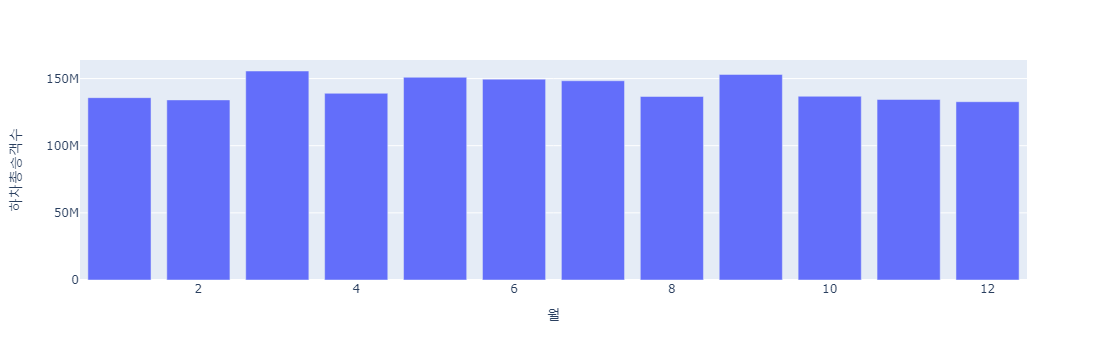

In [654]:
fig = px.bar(monn, x = '월', y = '하차총승객수')
fig.show()

In [373]:
day =bus2017[bus2017['월']==9].groupby('일')['하차총승객수'].sum().reset_index()

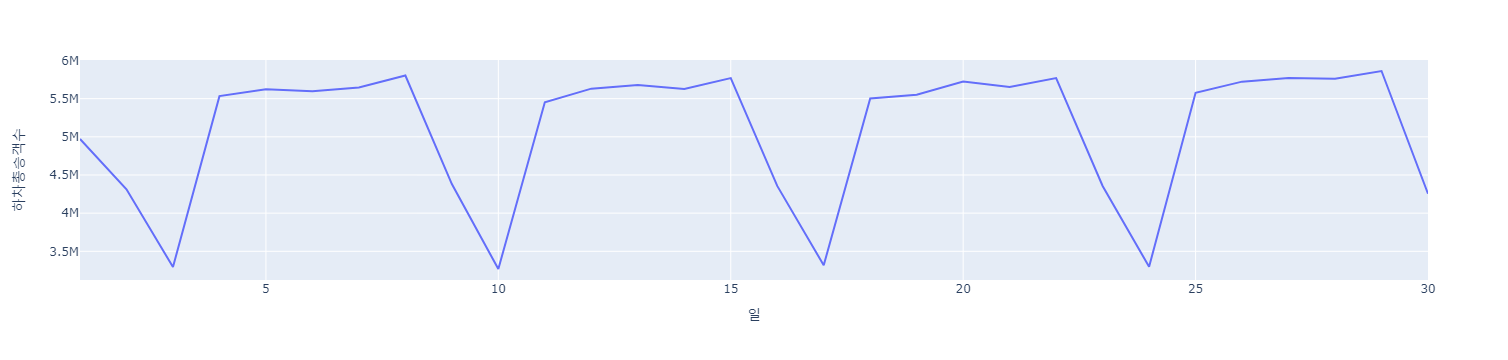

In [374]:
fig = px.line(day, x = '일', y = '하차총승객수')
fig.show()

In [395]:
bar=(Bar().add_xaxis(mon).add_yaxis('d',mo).set_global_opts(title_opts=opts.TitleOpts(title="Top cloud providers 2018", subtitle="2017-2018 Revenue"),
                     toolbox_opts=opts.ToolboxOpts()))
bar.render()

'C:\\pythonDir\\프로젝트\\버스\\render.html'

In [350]:
from pyecharts import options as opts

In [382]:
from pyecharts.charts import Line

In [391]:
Bar.add()

AttributeError: type object 'Bar' has no attribute 'add'

In [407]:
bar=(Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK)).add_xaxis(mon).add_yaxis('d',mo).set_global_opts(title_opts=opts.TitleOpts(title= "다크테마인디", subtitle="avenue"),
                     ))
bar.render()

'C:\\pythonDir\\프로젝트\\버스\\render.html'

In [394]:
bar.render()

'C:\\pythonDir\\프로젝트\\버스\\render.html'

In [401]:
print("pyecharts version : ", pyecharts.__version__)

pyecharts version :  1.9.1


SyntaxError: invalid syntax (1759121075.py, line 2)

In [405]:
from pyecharts.globals import ThemeType

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [411]:
pip install cufflinks

     ---------------------------------------- 81.7/81.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=f6e184b503777d8ece6dbfcff457704351411806c9ce8ebe4548b6ad2df462ee
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [435]:
pip install chart_studio

     ---------------------------------------- 64.4/64.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11431 sha256=a6b35a358b720a97aa5d2ad5bddc8fc5622f8cd5118759407b65dc577a2fdb2f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [521]:
# - Standard plotly imports
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [562]:
mon2017 = total2017.groupby('월')['하차총승객수'].sum().reset_index()
mon2018 = total2018.groupby('월')['하차총승객수'].sum().reset_index()
mon2019 = total2019.groupby('월')['하차총승객수'].sum().reset_index()
mon2020 = total2020.groupby('월')['하차총승객수'].sum().reset_index()
mon2021 = total2021.groupby('월')['하차총승객수'].sum().reset_index()

In [634]:
monAll=pd.concat([mon2017,mon2018,mon2019,mon2020,mon2021], axis=1)

In [507]:
bus2017

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표
0,20170101,2017,1,1,1001,354,126.987750,37.569765
1,20170101,2017,1,1,1002,705,126.996566,37.579183
2,20170101,2017,1,1,1003,1938,126.998340,37.582671
3,20170101,2017,1,1,1004,295,126.987613,37.568579
4,20170101,2017,1,1,1005,2604,127.001744,37.586243
...,...,...,...,...,...,...,...,...
4493256,20171228,2017,12,28,9913,881,127.029759,37.615085
4493257,20171228,2017,12,28,9916,83,127.028467,37.617276
4493258,20171228,2017,12,28,9917,159,127.025087,37.618291
4493259,20171228,2017,12,28,9918,314,127.022159,37.619188


In [635]:
monAll

,월,하차총승객수,월,하차총승객수,월,하차총승객수,월,하차총승객수,월,하차총승객수
0,1,293685738,1,305810104,1,311733243,1,290609969,1,198990195
1,2,292088266,2,269144893,2,266906445,2,243422581,2,199816363
2,3,336382450,3,332078054,3,326655767,3,202487484,3,248759084
3,4,311934671,4,321615091,4,328494580,4,213339125,4,245352655
4,5,323114022,5,324218635,5,337882877,5,221228667,5,241087829
5,6,317986713,6,298967308,6,310804936,6,236639373,6,250057761
6,7,313081956,7,316584201,7,326861508,7,246804961,7,228486091
7,8,300071687,8,311470149,8,314584719,8,222629947,8,220077199
8,9,326480798,9,296859472,9,302016723,9,209399280,9,221051848
9,10,293749080,10,331008751,10,335202642,10,238781999,10,241378892


In [636]:
monAll.columns

Index(['월', '하차총승객수', '월', '하차총승객수', '월', '하차총승객수', '월', '하차총승객수', '월',
       '하차총승객수'],
      dtype='object')

In [625]:
topAll=pd.concat([top17,top18,top19,top20,top21], axis = 1)

In [627]:
top17.sort_index

Index(['동', '하차총승객수', '동', '하차총승객수', '동', '하차총승객수', '동', '하차총승객수', '동',
       '하차총승객수'],
      dtype='object')

In [628]:
topAll

,동,하차총승객수,동,하차총승객수,동,하차총승객수,동,하차총승객수,동,하차총승객수
0,서초동,379027,서초동,368072,서초동,383664,서초동,362717,서초동,274703
1,신림동,326193,신림동,323852,신림동,317929,신림동,304086,신림동,254417
2,봉천동,253986,봉천동,260154,대치동,261975,봉천동,242550,대치동,190785
3,대치동,243402,대치동,250789,봉천동,255564,대치동,240177,봉천동,180811
4,구로동,235537,구로동,243279,구로동,215962,구로동,208074,구로동,174750


In [637]:
monAll.columns = ['월', '2017승객수', 'ㅇ월', '2018승객수', 'ㄹ월', '2019승객수', 'ㅎ월', '2020승객수', 'ㅗ월',
       '2021승객수']

In [638]:
monAll = monAll[['월','2017승객수','2018승객수','2019승객수','2020승객수','2021승객수']]

In [639]:
monAll

,월,2017승객수,2018승객수,2019승객수,2020승객수,2021승객수
0,1,293685738,305810104,311733243,290609969,198990195
1,2,292088266,269144893,266906445,243422581,199816363
2,3,336382450,332078054,326655767,202487484,248759084
3,4,311934671,321615091,328494580,213339125,245352655
4,5,323114022,324218635,337882877,221228667,241087829
5,6,317986713,298967308,310804936,236639373,250057761
6,7,313081956,316584201,326861508,246804961,228486091
7,8,300071687,311470149,314584719,222629947,220077199
8,9,326480798,296859472,302016723,209399280,221051848
9,10,293749080,331008751,335202642,238781999,241378892


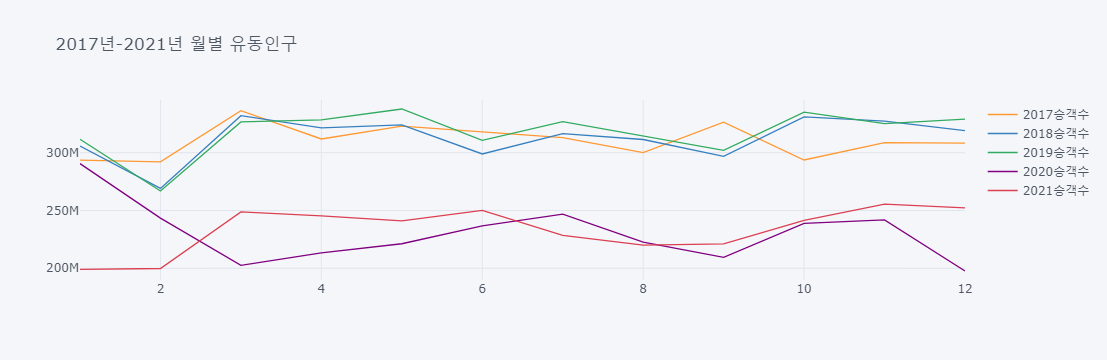

In [569]:
monAll.iplot(kind='line', title='2017년-2021년 월별 유동인구',x = '월')

In [577]:
yearAll=pd.concat([total2017.groupby('년')['하차총승객수'].sum().reset_index(),
           total2018.groupby('년')['하차총승객수'].sum().reset_index(),
           total2019.groupby('년')['하차총승객수'].sum().reset_index(),
           total2020.groupby('년')['하차총승객수'].sum().reset_index(),
           total2021.groupby('년')['하차총승객수'].sum().reset_index()])

In [578]:
yearAll.reset_index(drop=True, inplace = True)

In [579]:
yearAll['년'].astype('string')

0    2017
1    2018
2    2019
3    2020
4    2021
Name: 년, dtype: string

In [581]:
yearAll['년'] = ['2017년', '2018년','2019년', '2020년', '2021년']
yearAll

,년,하차총승객수
0,2017년,3725775294
1,2018년,3754300042
2,2019년,3815511949
3,2020년,2764805017
4,2021년,2802759460


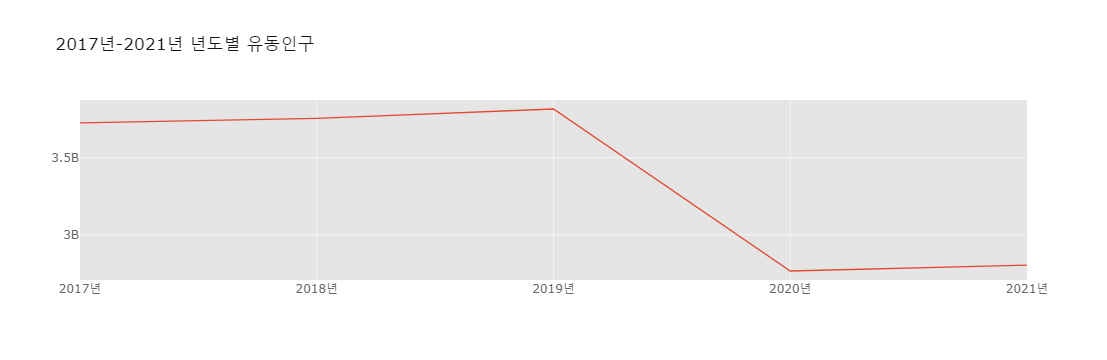

In [582]:
yearAll.iplot(kind='line', x= '년', y='하차총승객수', theme='ggplot' ,title='2017년-2021년 년도별 유동인구' )

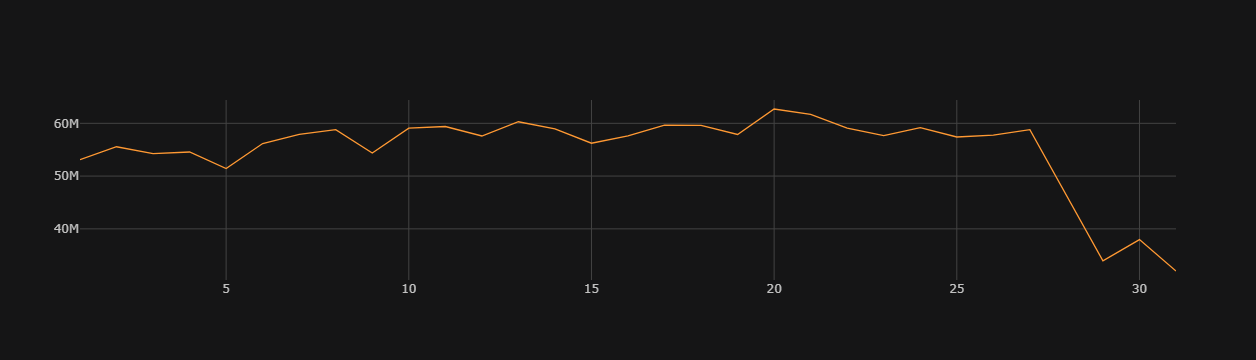

In [543]:
bus2017.groupby('일')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

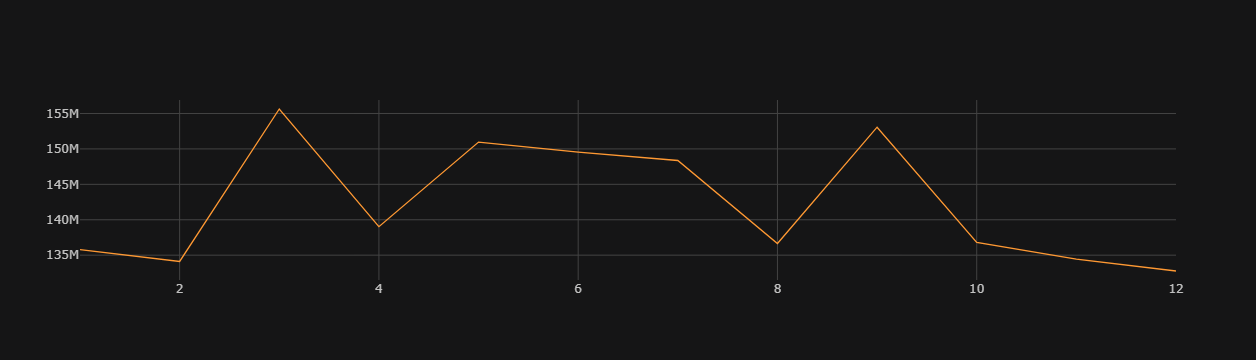

In [457]:
bus2017.groupby('월')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

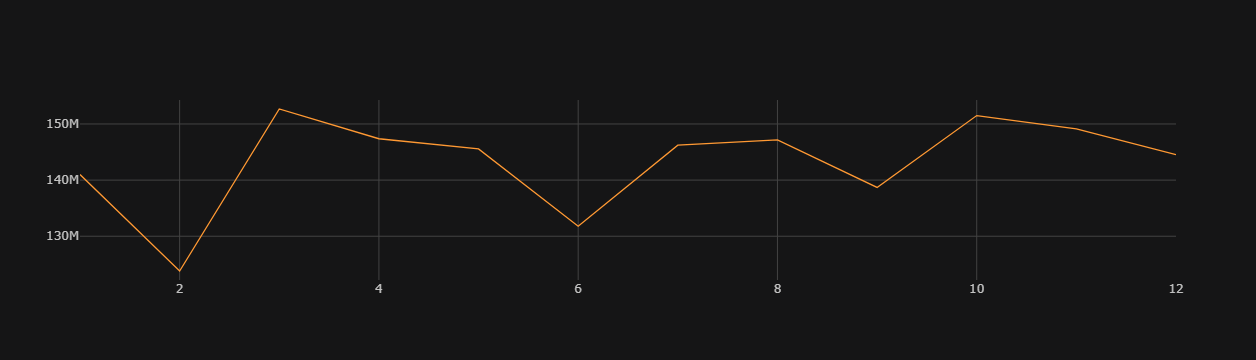

In [458]:
bus2018.groupby('월')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

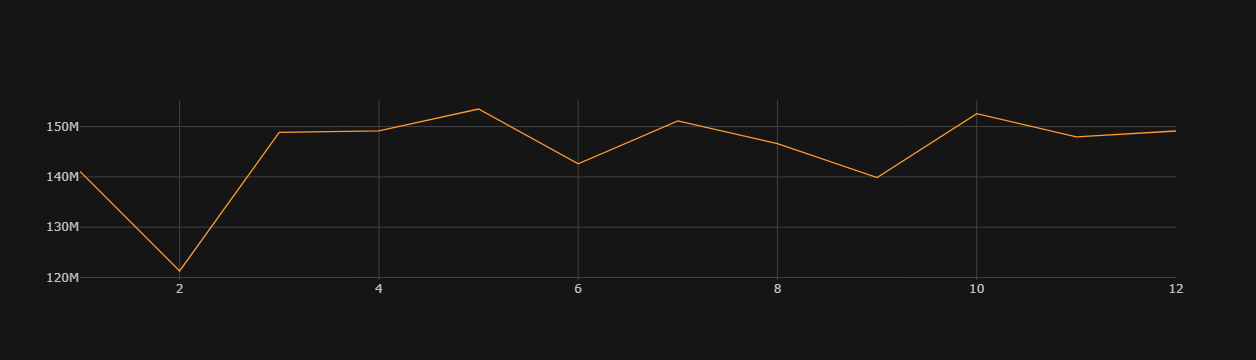

In [459]:
bus2019.groupby('월')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

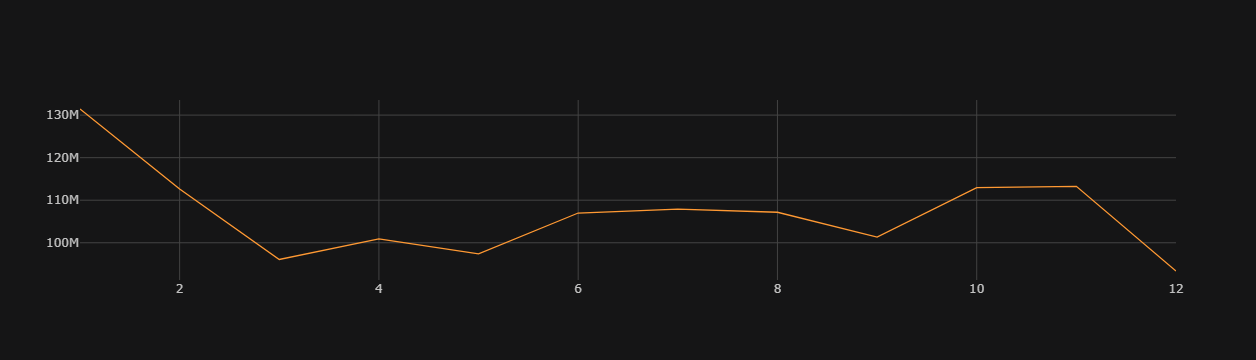

In [460]:
bus2020.groupby('월')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

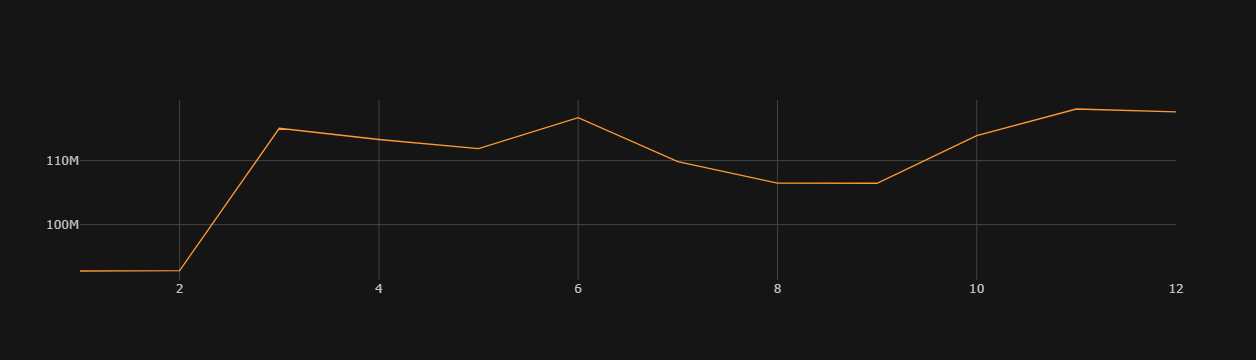

In [461]:
bus2021.groupby('월')['하차총승객수'].sum().iplot(kind='line', theme = 'solar')

In [163]:
import json
import requests

In [164]:
api_key = 'e42fd8d6d5e24be97fb6294004b0be29'

In [170]:
def lat_lon_to_addr(lon,lat):
    url = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x={longitude}&y={latitude}'.format(longitude=lon,latitude=lat)
    headers = {"Authorization": "KakaoAK " + api_key}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address_name']
    return addr.append(match_first)

In [171]:
addr = []
lat_lon_to_addr(data['좌표X'][0],data['좌표Y'][0])
addr

['서울특별시 종로구 종로2가']

In [308]:
addr = []
for i in range(0,2):
    try: lat_lon_to_addr(data['좌표X'][i],data['좌표Y'][i])
    except : 
        addr.append(None)

In [317]:
addr['merge on이 될 데이터'] = 데이터['merge on이 될 데이터']

NameError: name '데이터' is not defined

In [307]:
addr.rename = ['주소']

Index(['버스정류장ARS번호', '주소'], dtype='object')

In [177]:
bus2019['주소'] = addr

ValueError: Length of values (10935) does not match length of index (3845228)

In [314]:
addr = pd.DataFrame(addr)

In [315]:
addr.rename(columns={0:'주소'},inplace=True)

In [187]:
addr['주소'] = pd.DataFrame(addr)

In [197]:
addr = addr[['버스정류장ARS번호','주소']]

In [190]:
addr = addr.drop(columns=0)

In [194]:
addr['버스정류장ARS번호'] = data['ARS-ID']

In [193]:
data.columns

Index(['NODE_ID', 'ARS-ID', '정류소명', '좌표X', '좌표Y'], dtype='object')

In [42]:
addr=addr[['버스정류장ARS번호', '주소']]

In [145]:
bus2018.to_csv('2018버스.csv', index=False)

In [39]:
addr['버스정류장ARS번호']=add17['버스정류장ARS번호']

In [3]:
bus2017=pd.read_csv('2017버스_최종본.csv')

In [7]:
add17 = bus2017.groupby(['버스정류장ARS번호','X좌표', 'Y좌표'])['하차총승객수'].sum().reset_index()

In [9]:
add17.drop(columns='하차총승객수', inplace=True)

In [46]:
bus2017 = pd.merge(bus2017,addr, on = '버스정류장ARS번호', how='left')

In [50]:
bus2017['시'] = bus2017['주소'].str.split(' ').str.get(0)
bus2017['구'] = bus2017['주소'].str.split(' ').str.get(1)
bus2017['동'] = bus2017['주소'].str.split(' ').str.get(2)

In [53]:
bus2017.drop(columns='시', inplace = True)

In [204]:
bus2020 = pd.read_csv('2020버스_최종본.csv')
bus2021 = pd.read_csv('2021버스_최종본.csv')

In [59]:
data = pd.read_csv('data/서울시 버스정류소 위치 데이터(20180502).csv', encoding='cp949')

In [ ]:
addr = []
for i in range(0,10586):
    try: lat_lon_to_addr(add17['X좌표'][i],add17['Y좌표'][i])
    except : 
        addr.append(None)

In [62]:
len(data)

11018

data

In [140]:
len(addr)

10586

In [210]:
bus2021 = pd.merge(bus2021,addr, on = '버스정류장ARS번호', how='left')

In [211]:
bus2021

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표,주소
0,20210101,2021,1,1,1001,92,126.987786,37.569764,서울특별시 종로구 종로2가
1,20210101,2021,1,1,1002,311,126.996520,37.579179,서울특별시 종로구 와룡동
2,20210101,2021,1,1,1003,723,126.998290,37.582709,서울특별시 종로구 명륜4가
3,20210101,2021,1,1,1004,113,126.987507,37.568582,서울특별시 종로구 관철동
4,20210101,2021,1,1,1005,800,127.001694,37.586230,서울특별시 종로구 혜화동
...,...,...,...,...,...,...,...,...,...
3842730,20211231,2021,12,31,25761,0,127.171851,37.573889,서울특별시 강동구 강일동
3842731,20211231,2021,12,31,25762,1,127.176634,37.572743,서울특별시 강동구 강일동
3842732,20211231,2021,12,31,25763,30,127.176139,37.572518,서울특별시 강동구 강일동
3842733,20211231,2021,12,31,25764,19,127.172355,37.574115,서울특별시 강동구 강일동


In [212]:
bus2021['구'] = bus2021['주소'].str.split(' ').str.get(1)
bus2021['동'] = bus2021['주소'].str.split(' ').str.get(2)

In [213]:
bus2021

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표,주소,구,동
0,20210101,2021,1,1,1001,92,126.987786,37.569764,서울특별시 종로구 종로2가,종로구,종로2가
1,20210101,2021,1,1,1002,311,126.996520,37.579179,서울특별시 종로구 와룡동,종로구,와룡동
2,20210101,2021,1,1,1003,723,126.998290,37.582709,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20210101,2021,1,1,1004,113,126.987507,37.568582,서울특별시 종로구 관철동,종로구,관철동
4,20210101,2021,1,1,1005,800,127.001694,37.586230,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3842730,20211231,2021,12,31,25761,0,127.171851,37.573889,서울특별시 강동구 강일동,강동구,강일동
3842731,20211231,2021,12,31,25762,1,127.176634,37.572743,서울특별시 강동구 강일동,강동구,강일동
3842732,20211231,2021,12,31,25763,30,127.176139,37.572518,서울특별시 강동구 강일동,강동구,강일동
3842733,20211231,2021,12,31,25764,19,127.172355,37.574115,서울특별시 강동구 강일동,강동구,강일동


In [214]:
bus2021.to_csv('2021버스.csv', index=False)

In [167]:
addr = []
for i in range(0,10935):
    try: lat_lon_to_addr(data['X좌표'][i],data['Y좌표'][i])
    except : 
        addr.append(None)

In [168]:
addr

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [162]:
lat_lon_to_addr(data['좌표X'][0],data['좌표Y'][0])

In [253]:
bus2017

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표,주소,구,동
0,20170101,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,20170101,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,20170101,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20170101,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,20170101,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3733134,20171228,2017,12,28,9913,881,127.029759,37.615085,서울특별시 강북구 미아동,강북구,미아동
3733135,20171228,2017,12,28,9916,83,127.028467,37.617276,서울특별시 강북구 미아동,강북구,미아동
3733136,20171228,2017,12,28,9917,159,127.025087,37.618291,서울특별시 강북구 미아동,강북구,미아동
3733137,20171228,2017,12,28,9918,314,127.022159,37.619188,서울특별시 강북구 미아동,강북구,미아동


In [239]:
data =bus2017.groupby('일')['하차총승객수'].sum().to_list

### total 불러온당~

In [465]:
total2017= pd.read_csv('total_2017.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_9540\1662666301.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



### 파이차트 되려나
---
17년도꺼 완성~~~ 17년 9월 29일이 가장 많음

In [467]:
total2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863169 entries, 0 to 3863168
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   사용일자    int64  
 1   년       int64  
 2   월       int64  
 3   일       int64  
 4   식별      object 
 5   하차총승객수  int64  
 6   X좌표     float64
 7   Y좌표     float64
 8   주소      object 
 9   구       object 
 10  동       object 
dtypes: float64(2), int64(5), object(4)
memory usage: 324.2+ MB


In [468]:
total2017.info()
total2017['사용일자']=total2017['사용일자'].astype('str')
total2017['사용일자'] = pd.to_datetime(total2017['사용일자'])

In [469]:
total2017['사용일자'] = pd.to_datetime(total2017['사용일자'])

In [470]:
total2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863169 entries, 0 to 3863168
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   사용일자    datetime64[ns]
 1   년       int64         
 2   월       int64         
 3   일       int64         
 4   식별      object        
 5   하차총승객수  int64         
 6   X좌표     float64       
 7   Y좌표     float64       
 8   주소      object        
 9   구       object        
 10  동       object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 324.2+ MB


In [471]:
day_by_year = total2017.groupby('사용일자').sum()[['하차총승객수']].round(0)

In [472]:
day_by_year = day_by_year.reset_index()
day_by_year

,사용일자,하차총승객수
0,2017-01-01,5283433
1,2017-01-02,10527163
2,2017-01-03,11031787
3,2017-01-04,11231093
4,2017-01-05,11257172
...,...,...
360,2017-12-27,11421363
361,2017-12-28,8898280
362,2017-12-29,6440002
363,2017-12-30,4475396


In [473]:
data = day_by_year[['사용일자','하차총승객수']].values.tolist()
data

[[Timestamp('2017-01-01 00:00:00'), 5283433],
 [Timestamp('2017-01-02 00:00:00'), 10527163],
 [Timestamp('2017-01-03 00:00:00'), 11031787],
 [Timestamp('2017-01-04 00:00:00'), 11231093],
 [Timestamp('2017-01-05 00:00:00'), 11257172],
 [Timestamp('2017-01-06 00:00:00'), 11703246],
 [Timestamp('2017-01-07 00:00:00'), 9022911],
 [Timestamp('2017-01-08 00:00:00'), 6445523],
 [Timestamp('2017-01-09 00:00:00'), 11112746],
 [Timestamp('2017-01-10 00:00:00'), 11206817],
 [Timestamp('2017-01-11 00:00:00'), 11130131],
 [Timestamp('2017-01-12 00:00:00'), 11346638],
 [Timestamp('2017-01-13 00:00:00'), 11489555],
 [Timestamp('2017-01-14 00:00:00'), 8275529],
 [Timestamp('2017-01-15 00:00:00'), 6004185],
 [Timestamp('2017-01-16 00:00:00'), 10912886],
 [Timestamp('2017-01-17 00:00:00'), 11277656],
 [Timestamp('2017-01-18 00:00:00'), 11425471],
 [Timestamp('2017-01-19 00:00:00'), 11485202],
 [Timestamp('2017-01-20 00:00:00'), 12368566],
 [Timestamp('2017-01-21 00:00:00'), 8926570],
 [Timestamp('2017-0

In [474]:
day_by_year['하차총승객수'].max()

12657072

In [475]:
max_day = day_by_year['하차총승객수'].max()
min_day = day_by_year['하차총승객수'].min()

In [247]:
from pyecharts.charts import Calendar
from pyecharts import options as opts

In [478]:
cal = (Calendar()
 .add('',data,calendar_opts=opts.CalendarOpts(range_='2017'))
 .set_global_opts(
     title_opts=opts.TitleOpts(title='2017년도 지하철, 버스 유동인구', subtitle='일별 데이터'),
     legend_opts=opts.LegendOpts(is_show=False),
     visualmap_opts=opts.VisualMapOpts(
         max_ = max_day,
         min_ = min_day,
         orient='horizontal',
         is_piecewise=False,
         pos_top='230px',
         pos_left='100px',
     )))

In [479]:
cal.render()

'C:\\pythonDir\\프로젝트\\버스\\render.html'

### 지도 히트맵

In [333]:
import folium.plugins
import branca
import branca.colormap as cm

In [530]:
#특정날짜 조회하여서 하기!!

In [463]:
import folium
from folium import plugins
seoul_loc = (37.566535, 126.9779692)
seoul = folium.Map(seoul_loc, zoom_start=10, tiles='stamenterrain')
seoul.add_child(plugins.HeatMap(zip(total['Y좌표'], year170929['X좌표'], year170929['하차총승객수']), S))


In [347]:
bus2017['하차총승객수'].mean()

457.30257325001827

In [292]:
bus2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733139 entries, 0 to 3733138
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   사용일자        datetime64[ns]
 1   년           int64         
 2   월           int64         
 3   일           int64         
 4   버스정류장ARS번호  int64         
 5   하차총승객수      int64         
 6   X좌표         float64       
 7   Y좌표         float64       
 8   주소          object        
 9   구           object        
 10  동           object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 470.8+ MB


In [298]:
year170929= bus2017[bus2017['사용일자']== '2017-09-29']

In [300]:
year170929.columns

Index(['사용일자', '년', '월', '일', '버스정류장ARS번호', '하차총승객수', 'X좌표', 'Y좌표', '주소', '구',
       '동'],
      dtype='object')

### 지도 지오 완전 틀려서 안됨!!!!

In [ ]:
bus2017.groupby('일'), 

In [398]:
import json
jsonfile = open('HangJeongDong_ver20220701.geojson','r', encoding='utf-8').read()
type(jsonfile)
jsondata = json.loads(jsonfile)
type(jsondata)

json_seoul = {"type": "FeatureCollection"}

json_pick = []
json_dong = []



In [399]:
for item in jsondata['features']:
    # print(item['properties']['sidonm'])
    if item['properties']['sidonm']=='서울특별시':
        dong = item['properties']['adm_nm'].split()[-1].strip() #strip:앞뒤 공백제거
        item['id'] = dong
        json_pick.append(item)
        json_dong.append(dong)
        
json_seoul['features']=json_pick



In [401]:
loc = (37.566535, 126.9779692)

In [402]:
m = folium.Map(loc,zoom_start=11)
folium.Choropleth(geo_data=json_seoul, data=bus2017, columns=['동','하차총승객수'],
                  fill_color = 'OrRd', #채우는 색깔
                  #'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', and 'YlOrRd'.
                  fill_opacity= 0.8, #투명도
                  key_on='feature.id').add_to(m)

In [403]:
m

In [414]:
len(json_dong), len(dong)

(426, 428)

In [411]:
dong= bus2017.groupby('동')['하차총승객수'].sum().reset_index()

In [415]:
json_dong = sorted(json_dong)
json_dong


['가락1동',
 '가락2동',
 '가락본동',
 '가리봉동',
 '가산동',
 '가양1동',
 '가양2동',
 '가양3동',
 '가회동',
 '갈현1동',
 '갈현2동',
 '강일동',
 '개봉1동',
 '개봉2동',
 '개봉3동',
 '개포1동',
 '개포2동',
 '개포4동',
 '거여1동',
 '거여2동',
 '고덕1동',
 '고덕2동',
 '고척1동',
 '고척2동',
 '공덕동',
 '공릉1동',
 '공릉2동',
 '공항동',
 '광장동',
 '광희동',
 '교남동',
 '구로1동',
 '구로2동',
 '구로3동',
 '구로4동',
 '구로5동',
 '구산동',
 '구의1동',
 '구의2동',
 '구의3동',
 '군자동',
 '금호1가동',
 '금호2·3가동',
 '금호4가동',
 '길동',
 '길음1동',
 '길음2동',
 '낙성대동',
 '난곡동',
 '난향동',
 '남가좌1동',
 '남가좌2동',
 '남영동',
 '남현동',
 '내곡동',
 '노량진1동',
 '노량진2동',
 '녹번동',
 '논현1동',
 '논현2동',
 '능동',
 '다산동',
 '답십리1동',
 '답십리2동',
 '당산1동',
 '당산2동',
 '대림1동',
 '대림2동',
 '대림3동',
 '대방동',
 '대조동',
 '대치1동',
 '대치2동',
 '대치4동',
 '대학동',
 '대흥동',
 '도곡1동',
 '도곡2동',
 '도림동',
 '도봉1동',
 '도봉2동',
 '도화동',
 '독산1동',
 '독산2동',
 '독산3동',
 '독산4동',
 '돈암1동',
 '돈암2동',
 '동선동',
 '동화동',
 '둔촌1동',
 '둔촌2동',
 '등촌1동',
 '등촌2동',
 '등촌3동',
 '마장동',
 '마천1동',
 '마천2동',
 '망우3동',
 '망우본동',
 '망원1동',
 '망원2동',
 '면목2동',
 '면목3·8동',
 '면목4동',
 '면목5동',
 '면목7동',
 '면목본동',
 '명동',
 '명일1동',
 '명일2동',
 '목1동',
 '목2동',
 '목3

In [413]:
df_dong= sorted(dong['동'])
df_dong

['가락동',
 '가리봉동',
 '가산동',
 '가양동',
 '가회동',
 '갈월동',
 '갈현동',
 '감일동',
 '강일동',
 '개봉동',
 '개포동',
 '개화동',
 '거여동',
 '견지동',
 '경운동',
 '계동',
 '고덕동',
 '고척동',
 '공덕동',
 '공릉동',
 '공평동',
 '공항동',
 '과해동',
 '관수동',
 '관철동',
 '관훈동',
 '광장동',
 '광희동1가',
 '광희동2가',
 '교남동',
 '교북동',
 '구기동',
 '구로동',
 '구산동',
 '구수동',
 '구의동',
 '군자동',
 '궁동',
 '궁정동',
 '금호동1가',
 '금호동2가',
 '금호동3가',
 '금호동4가',
 '길동',
 '길음동',
 '낙원동',
 '남가좌동',
 '남대문로1가',
 '남대문로2가',
 '남대문로3가',
 '남대문로4가',
 '남대문로5가',
 '남산동1가',
 '남영동',
 '남창동',
 '남현동',
 '내곡동',
 '내발산동',
 '내자동',
 '냉천동',
 '노고산동',
 '노량진동',
 '녹번동',
 '논현동',
 '누상동',
 '누하동',
 '능동',
 '다동',
 '답십리동',
 '당산동',
 '당산동1가',
 '당산동2가',
 '당산동3가',
 '당산동4가',
 '당산동5가',
 '당산동6가',
 '당인동',
 '대림동',
 '대방동',
 '대신동',
 '대조동',
 '대치동',
 '대현동',
 '대흥동',
 '도곡동',
 '도림동',
 '도봉동',
 '도선동',
 '도원동',
 '도화동',
 '독산동',
 '돈암동',
 '동교동',
 '동빙고동',
 '동선동1가',
 '동선동2가',
 '동선동4가',
 '동선동5가',
 '동소문동1가',
 '동소문동2가',
 '동소문동3가',
 '동소문동4가',
 '동소문동5가',
 '동소문동6가',
 '동소문동7가',
 '동숭동',
 '동자동',
 '동작동',
 '둔촌동',
 '등촌동',
 '마곡동',
 '마장동',
 '마천동',
 '마포동',
 '만리동1가',
 '만리동2

In [441]:
for i , item in enumerate(zip(df_dong, json_dong)): #인덱스를 같이 리턴
    print(i,item)

0 ('가락동', '가락1동')
1 ('가리봉동', '가락2동')
2 ('가산동', '가락본동')
3 ('가양동', '가리봉동')
4 ('가회동', '가산동')
5 ('갈월동', '가양1동')
6 ('갈현동', '가양2동')
7 ('감일동', '가양3동')
8 ('강일동', '가회동')
9 ('개봉동', '갈현1동')
10 ('개포동', '갈현2동')
11 ('개화동', '강일동')
12 ('거여동', '개봉1동')
13 ('견지동', '개봉2동')
14 ('경운동', '개봉3동')
15 ('계동', '개포1동')
16 ('고덕동', '개포2동')
17 ('고척동', '개포4동')
18 ('공덕동', '거여1동')
19 ('공릉동', '거여2동')
20 ('공평동', '고덕1동')
21 ('공항동', '고덕2동')
22 ('과해동', '고척1동')
23 ('관수동', '고척2동')
24 ('관철동', '공덕동')
25 ('관훈동', '공릉1동')
26 ('광장동', '공릉2동')
27 ('광희동1가', '공항동')
28 ('광희동2가', '광장동')
29 ('교남동', '광희동')
30 ('교북동', '교남동')
31 ('구기동', '구로1동')
32 ('구로동', '구로2동')
33 ('구산동', '구로3동')
34 ('구수동', '구로4동')
35 ('구의동', '구로5동')
36 ('군자동', '구산동')
37 ('궁동', '구의1동')
38 ('궁정동', '구의2동')
39 ('금호동1가', '구의3동')
40 ('금호동2가', '군자동')
41 ('금호동3가', '금호1가동')
42 ('금호동4가', '금호2·3가동')
43 ('길동', '금호4가동')
44 ('길음동', '길동')
45 ('낙원동', '길음1동')
46 ('남가좌동', '길음2동')
47 ('남대문로1가', '낙성대동')
48 ('남대문로2가', '난곡동')
49 ('남대문로3가', '난향동')
50 ('남대문로4가', '남가좌1동')
51 ('남대문로5가', '남가좌2동')
52 

### 피벗 테이블

2017-12-22 / 2018-12-20 / 2019-12-20 / 2020-01-17 / 2021-06-25

In [532]:
total2018.head()

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,20180101,2018,1,1,1001,159,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,20180101,2018,1,1,1002,623,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,20180101,2018,1,1,1003,1953,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20180101,2018,1,1,1004,176,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,20180101,2018,1,1,1005,2125,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동


In [376]:
import s

In [605]:
total2017['사용일자']= total2017['사용일자'].astype('str')
total2017

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,20170101,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,20170101,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,20170101,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20170101,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,20170101,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3863164,20171231,2017,12,31,종로3가,25522,126.991806,37.571607,서울특별시 종로구 묘동,종로구,묘동
3863165,20171231,2017,12,31,종각,42903,126.982923,37.570161,서울특별시 종로구 종로1가,종로구,종로1가
3863166,20171231,2017,12,31,시청,17461,126.977108,37.564718,서울특별시 중구 태평로2가,중구,태평로2가
3863167,20171231,2017,12,31,서울역,42623,126.972559,37.554648,서울특별시 중구 봉래동2가,중구,봉래동2가


In [606]:

total2017['사용일자'] =pd.to_datetime(total2017['사용일자'])

In [607]:
total2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863169 entries, 0 to 3863168
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   사용일자    datetime64[ns]
 1   년       int64         
 2   월       int64         
 3   일       int64         
 4   식별      object        
 5   하차총승객수  int64         
 6   X좌표     float64       
 7   Y좌표     float64       
 8   주소      object        
 9   구       object        
 10  동       object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 324.2+ MB


In [608]:
day17 = total2017[total2017['사용일자']=='2017-12-22']
day17

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
3662291,2017-12-22,2017,12,22,10001,1516,127.045431,37.689195,서울특별시 도봉구 도봉동,도봉구,도봉동
3662292,2017-12-22,2017,12,22,10002,1352,127.045813,37.688568,서울특별시 도봉구 도봉동,도봉구,도봉동
3662293,2017-12-22,2017,12,22,10003,478,127.045946,37.684052,서울특별시 도봉구 도봉동,도봉구,도봉동
3662294,2017-12-22,2017,12,22,10004,2004,127.046067,37.682672,서울특별시 도봉구 도봉동,도봉구,도봉동
3662295,2017-12-22,2017,12,22,10005,543,127.044921,37.677775,서울특별시 도봉구 도봉동,도봉구,도봉동
...,...,...,...,...,...,...,...,...,...,...,...
3859878,2017-12-22,2017,12,22,종로5가,33116,127.001849,37.570926,서울특별시 종로구 종로5가,종로구,종로5가
3859879,2017-12-22,2017,12,22,종로3가,41537,126.991806,37.571607,서울특별시 종로구 묘동,종로구,묘동
3859880,2017-12-22,2017,12,22,종각,60933,126.982923,37.570161,서울특별시 종로구 종로1가,종로구,종로1가
3859881,2017-12-22,2017,12,22,시청,31923,126.977108,37.564718,서울특별시 중구 태평로2가,중구,태평로2가


In [610]:
date = day17.groupby('동')['하차총승객수'].sum().reset_index()

top17 = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top17

,동,하차총승객수
0,서초동,379027
1,신림동,326193
2,봉천동,253986
3,대치동,243402
4,구로동,235537


In [615]:
total2018['사용일자']= total2018['사용일자'].astype('str')
total2018['사용일자'] =pd.to_datetime(total2018['사용일자'])
day18 = total2018[total2018['사용일자']=='2018-12-20']
date = day18.groupby('동')['하차총승객수'].sum().reset_index()

top18 = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top18

,동,하차총승객수
0,서초동,368072
1,신림동,323852
2,봉천동,260154
3,대치동,250789
4,구로동,243279


In [616]:
total2019['사용일자']= total2019['사용일자'].astype('str')
total2019['사용일자'] =pd.to_datetime(total2019['사용일자'])
day19 = total2019[total2019['사용일자']=='2019-12-20']
date = day19.groupby('동')['하차총승객수'].sum().reset_index()

top19 = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top19

,동,하차총승객수
0,서초동,383664
1,신림동,317929
2,대치동,261975
3,봉천동,255564
4,구로동,215962


In [617]:
total2020['사용일자']= total2020['사용일자'].astype('str')
total2020['사용일자'] =pd.to_datetime(total2020['사용일자'])
day20 = total2020[total2020['사용일자']=='2020-01-17']
date = day20.groupby('동')['하차총승객수'].sum().reset_index()

top20 = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top20

,동,하차총승객수
0,서초동,362717
1,신림동,304086
2,봉천동,242550
3,대치동,240177
4,구로동,208074


In [ ]:
2020-01-17 / 2021-06-25

In [618]:
total2021['사용일자']= total2021['사용일자'].astype('str')
total2021['사용일자'] =pd.to_datetime(total2021['사용일자'])
day21 = total2021[total2021['사용일자']=='2021-06-25']
date = day21.groupby('동')['하차총승객수'].sum().reset_index()

top21 = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top21.columns

,동,하차총승객수
0,서초동,274703
1,신림동,254417
2,대치동,190785
3,봉천동,180811
4,구로동,174750


In [692]:
top21.columns

Index(['동', '하차총승객수'], dtype='object')

In [589]:
date = day.groupby('동')['하차총승객수'].sum().reset_index()

top = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head()
top

,동,하차총승객수


In [591]:
total2017[total2017['사용일자']=='2017-12-22']

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동


In [603]:
total2017

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,20170101,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,20170101,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,20170101,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20170101,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,20170101,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3863164,20171231,2017,12,31,종로3가,25522,126.991806,37.571607,서울특별시 종로구 묘동,종로구,묘동
3863165,20171231,2017,12,31,종각,42903,126.982923,37.570161,서울특별시 종로구 종로1가,종로구,종로1가
3863166,20171231,2017,12,31,시청,17461,126.977108,37.564718,서울특별시 중구 태평로2가,중구,태평로2가
3863167,20171231,2017,12,31,서울역,42623,126.972559,37.554648,서울특별시 중구 봉래동2가,중구,봉래동2가


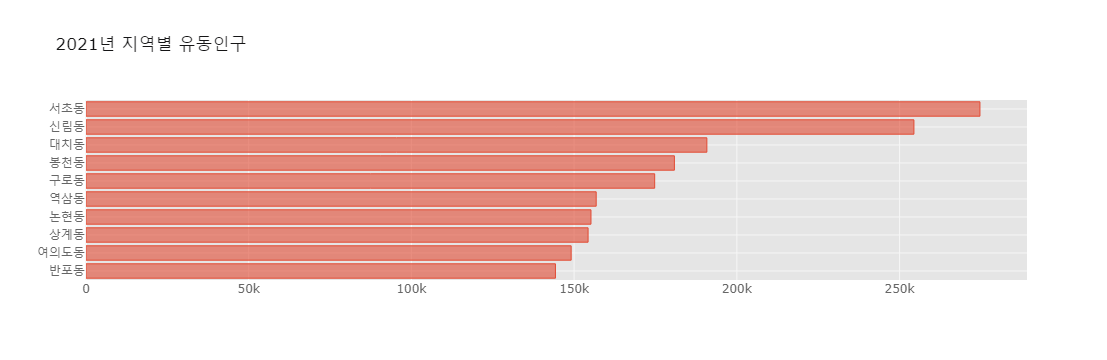

In [561]:

top = top.sort_values('하차총승객수')
top.iplot(kind='barh', x= '동', y='하차총승객수', theme='ggplot' ,title='2021년 지역별 유동인구' )

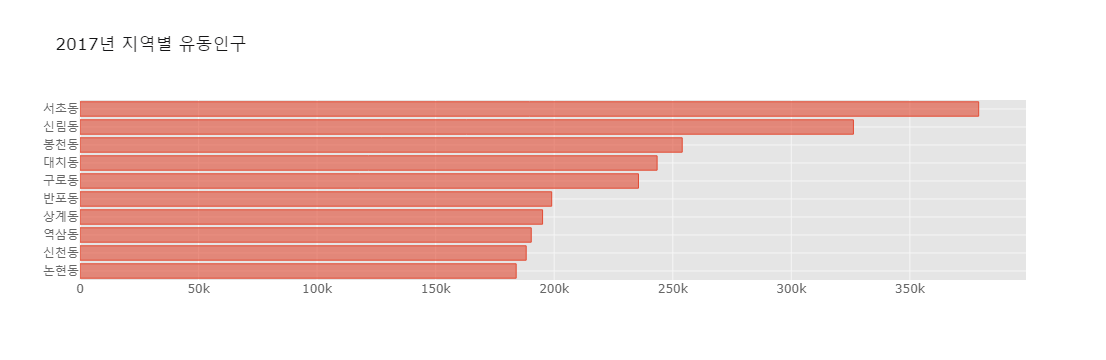

In [525]:
date = day.groupby('동')['하차총승객수'].sum().reset_index()

top = date.sort_values('하차총승객수', ascending=False).reset_index(drop=True).head(10)
top = top.sort_values('하차총승객수')
top.iplot(kind='barh', x= '동', y='하차총승객수', theme='ggplot' ,title='2017년 지역별 유동인구' )

In [ ]:
yearAll.iplot(kind='bar', x= '년', y='하차총승객수', theme='ggplot' ,title='2017년-2021년 년도별 유동인구' )

In [ ]:
서초169 신림262 봉천195 대치60 구로134

In [690]:
seo=bus2017[bus2017['동']=='구로동']
seo = seo[seo['일']==1]

In [691]:
seo[seo['월']==1].count()

사용일자          134
년             134
월             134
일             134
버스정류장ARS번호    134
하차총승객수        134
X좌표           134
Y좌표           134
주소            134
구             134
동             134
dtype: int64

In [694]:
'동' = list['서초동','신림동','봉천동','대치동','구로동']

SyntaxError: cannot assign to literal (3229392508.py, line 1)

In [632]:
total2017

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,2017-01-01,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,2017-01-01,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,2017-01-01,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,2017-01-01,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,2017-01-01,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3863164,2017-12-31,2017,12,31,종로3가,25522,126.991806,37.571607,서울특별시 종로구 묘동,종로구,묘동
3863165,2017-12-31,2017,12,31,종각,42903,126.982923,37.570161,서울특별시 종로구 종로1가,종로구,종로1가
3863166,2017-12-31,2017,12,31,시청,17461,126.977108,37.564718,서울특별시 중구 태평로2가,중구,태평로2가
3863167,2017-12-31,2017,12,31,서울역,42623,126.972559,37.554648,서울특별시 중구 봉래동2가,중구,봉래동2가


In [602]:
total2017=pd.read_csv('total_2017.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_9540\3674589133.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [594]:
total2018=pd.read_csv('total_2018.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_9540\2481099584.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [595]:
total2019=pd.read_csv('total_2019.csv')
total2020=pd.read_csv('total_2020.csv')
total2021=pd.read_csv('total_2021.csv')


C:\Users\user\AppData\Local\Temp\ipykernel_9540\3931627919.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\user\AppData\Local\Temp\ipykernel_9540\3931627919.py:2: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\user\AppData\Local\Temp\ipykernel_9540\3931627919.py:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
.sort_value('하차총승객수')

In [493]:
total2017

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,2017-01-01,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,2017-01-01,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,2017-01-01,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,2017-01-01,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,2017-01-01,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3863164,2017-12-31,2017,12,31,종로3가,25522,126.991806,37.571607,서울특별시 종로구 묘동,종로구,묘동
3863165,2017-12-31,2017,12,31,종각,42903,126.982923,37.570161,서울특별시 종로구 종로1가,종로구,종로1가
3863166,2017-12-31,2017,12,31,시청,17461,126.977108,37.564718,서울특별시 중구 태평로2가,중구,태평로2가
3863167,2017-12-31,2017,12,31,서울역,42623,126.972559,37.554648,서울특별시 중구 봉래동2가,중구,봉래동2가


In [438]:
b17 = bb17.pivot_table(index='동', columns='월', values = '하차총승객수')
b17

월,1,2,3,4,5,6,7,8,9,10,11,12
동,,,,,,,,,,,,
가락동,701358.0,694425.0,796010.0,715287.0,758152.0,760927.0,763866.0,714302.0,782542.0,693747.0,682796.0,679242.0
가리봉동,239036.0,228610.0,262974.0,237315.0,257128.0,253538.0,253734.0,221428.0,252459.0,239766.0,229254.0,220970.0
가산동,888013.0,876011.0,976084.0,851101.0,903094.0,916441.0,932463.0,826030.0,928549.0,821257.0,856573.0,832327.0
가양동,257475.0,255714.0,295163.0,264145.0,280485.0,283326.0,286858.0,257015.0,284271.0,250759.0,246564.0,243235.0
가회동,20687.0,20731.0,22085.0,19893.0,24624.0,23519.0,25303.0,25016.0,26075.0,22463.0,21960.0,23452.0
...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,110411.0,108598.0,133087.0,117237.0,127745.0,128672.0,126043.0,110993.0,134153.0,116802.0,116462.0,111927.0
후암동,160233.0,156558.0,180742.0,174288.0,181458.0,181961.0,188065.0,178655.0,190612.0,171611.0,161394.0,157977.0
휘경동,722835.0,722370.0,888363.0,798755.0,848561.0,824788.0,804709.0,741676.0,864126.0,756601.0,762187.0,751968.0


In [ ]:
b17.sort_values()

In [ ]:
b17.sort_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ascending=False).head(10)

In [456]:
bb17= bus2017.groupby(['월','일','동'])['하차총승객수'].sum().reset_index()
bb17

,월,일,동,하차총승객수
0,1,1,가락동,12139
1,1,1,가리봉동,5914
2,1,1,가산동,15268
3,1,1,가양동,4639
4,1,1,가회동,305
...,...,...,...,...
152486,12,28,효창동,3048
152487,12,28,후암동,3065
152488,12,28,휘경동,14429
152489,12,28,흑석동,15583


In [484]:
b17 = total2017.pivot_table(index='일', columns='동', values = '하차총승객수')
b17

동,가락동,가리봉동,가산동,가양동,가회동,갈월동,갈현동,감일동,강일동,개봉동,...,회기동,회현동1가,회현동2가,효자동,효제동,효창동,후암동,휘경동,흑석동,흥인동
일,,,,,,,,,,,,,,,,,,,,,
1,987.220144,1058.416667,1018.696429,410.237363,90.979167,2434.491018,806.918502,57.750000,215.933063,654.037209,...,735.527778,294.500000,819.208333,683.541667,557.666667,672.712963,349.718750,1561.482323,416.051370,6010.083333
2,1027.308908,1134.547619,1061.461538,415.852747,94.645833,2462.023810,825.071823,53.000000,218.832685,673.983349,...,785.000000,304.916667,816.083333,695.208333,584.638889,683.319444,355.822917,1611.560606,429.380952,5997.375000
3,994.064655,1128.452381,1069.398122,407.496703,95.375000,2387.220238,808.213496,51.333333,216.039448,652.924144,...,737.240741,303.388889,787.416667,702.791667,554.527778,670.638889,343.614583,1556.717172,410.119250,5977.625000
4,993.488506,1119.357143,1051.507042,409.553846,96.458333,2465.309524,819.391832,53.833333,213.747554,672.731481,...,788.407407,329.166667,862.791667,682.708333,563.305556,692.212963,349.322917,1601.111111,417.601363,5980.395833
5,930.258621,1077.309524,980.316135,385.566079,91.343750,2321.595238,764.568908,50.833333,202.009785,628.439408,...,724.601852,304.472222,763.916667,675.250000,520.388889,647.208333,335.505208,1500.500000,396.752981,5641.604167
6,1049.191092,1141.428571,1149.070423,436.640969,97.062500,2583.880952,832.711454,56.500000,225.126706,680.217391,...,849.546296,295.250000,772.416667,736.416667,610.277778,733.972222,352.192708,1642.040404,437.479522,6203.520833
7,1115.184173,1174.333333,1255.964251,461.637168,100.295455,2848.751553,906.859447,60.090909,233.267857,714.473978,...,894.259615,281.055556,866.791667,794.291667,646.142857,778.485714,374.360215,1737.638462,468.197232,6483.020833
8,1091.093391,1183.880952,1166.613871,450.528634,98.489583,2680.339286,870.763596,57.250000,232.242188,714.234968,...,859.462963,314.250000,829.166667,758.500000,613.833333,749.949074,372.697917,1718.305556,457.052811,6319.687500
9,1001.015805,1116.904762,1044.717901,410.834802,87.104167,2406.023810,814.371555,50.583333,212.990272,670.175763,...,743.611111,297.083333,775.458333,681.333333,565.388889,678.500000,350.375000,1586.378788,415.420068,5930.770833


In [485]:
b17.sort_index('일',ascending=False).head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_9540\4077043730.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.



ValueError: No axis named 일 for object type DataFrame

In [451]:
b17.sort_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ascending=False).head(10)

월,1,2,3,4,5,6,7,8,9,10,11,12
동,,,,,,,,,,,,
신림동,5323635.0,5208220.0,6034359.0,5377410.0,5797818.0,5659883.0,5642509.0,5091943.0,5793349.0,5291987.0,5175447.0,5054192.0
봉천동,3272703.0,3220737.0,3793744.0,3383286.0,3639316.0,3610409.0,3624788.0,3307842.0,3732685.0,3311304.0,3289879.0,3210972.0
미아동,2641495.0,2586352.0,2981628.0,2663002.0,2939725.0,2867718.0,2855044.0,2674748.0,2732241.0,2504335.0,2391555.0,2419475.0
구로동,2509199.0,2445408.0,2738930.0,2410347.0,2598860.0,2620084.0,2681390.0,2377276.0,2705594.0,2455105.0,2424815.0,2407740.0
화곡동,2270686.0,2225183.0,2523677.0,2239466.0,2422434.0,2432600.0,2481332.0,2263898.0,2488785.0,2232881.0,2192012.0,2183931.0
서초동,2266110.0,2277222.0,2530489.0,2217092.0,2360166.0,2421967.0,2489151.0,2275276.0,2487746.0,2111453.0,2153755.0,2119509.0
수유동,1989573.0,1936312.0,2255558.0,1998934.0,2213653.0,2152426.0,2132349.0,2004152.0,1989113.0,1817111.0,1729757.0,1764114.0
목동,1946881.0,1911413.0,2115277.0,1866969.0,2031659.0,2019237.0,2077321.0,1907505.0,2063711.0,1852983.0,1837822.0,1847995.0
독산동,1685949.0,1626949.0,1855229.0,1655096.0,1786549.0,1756639.0,1740044.0,1521605.0,1777126.0,1641036.0,1609658.0,1567003.0


In [417]:
bus2021.head()

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표,주소,구,동
0,20210101,2021,1,1,1001,92,126.987786,37.569764,서울특별시 종로구 종로2가,종로구,종로2가
1,20210101,2021,1,1,1002,311,126.996520,37.579179,서울특별시 종로구 와룡동,종로구,와룡동
2,20210101,2021,1,1,1003,723,126.998290,37.582709,서울특별시 종로구 명륜4가,종로구,명륜4가
3,20210101,2021,1,1,1004,113,126.987507,37.568582,서울특별시 종로구 관철동,종로구,관철동
4,20210101,2021,1,1,1005,800,127.001694,37.586230,서울특별시 종로구 혜화동,종로구,혜화동


In [449]:
bus2017

,사용일자,년,월,일,버스정류장ARS번호,하차총승객수,X좌표,Y좌표,주소,구,동
0,2017-01-01,2017,1,1,1001,354,126.987750,37.569765,서울특별시 종로구 종로2가,종로구,종로2가
1,2017-01-01,2017,1,1,1002,705,126.996566,37.579183,서울특별시 종로구 연건동,종로구,연건동
2,2017-01-01,2017,1,1,1003,1938,126.998340,37.582671,서울특별시 종로구 명륜4가,종로구,명륜4가
3,2017-01-01,2017,1,1,1004,295,126.987613,37.568579,서울특별시 종로구 관철동,종로구,관철동
4,2017-01-01,2017,1,1,1005,2604,127.001744,37.586243,서울특별시 종로구 혜화동,종로구,혜화동
...,...,...,...,...,...,...,...,...,...,...,...
3733134,2017-12-28,2017,12,28,9913,881,127.029759,37.615085,서울특별시 강북구 미아동,강북구,미아동
3733135,2017-12-28,2017,12,28,9916,83,127.028467,37.617276,서울특별시 강북구 미아동,강북구,미아동
3733136,2017-12-28,2017,12,28,9917,159,127.025087,37.618291,서울특별시 강북구 미아동,강북구,미아동
3733137,2017-12-28,2017,12,28,9918,314,127.022159,37.619188,서울특별시 강북구 미아동,강북구,미아동


In [458]:
bus2017.to_csv("2017버스.csv", index=False)

In [646]:
total2021.head()

,사용일자,년,월,일,식별,하차총승객수,X좌표,Y좌표,주소,구,동
0,2021-01-01,2021,1,1,1001,92,126.987786,37.569764,서울특별시 종로구 종로2가,종로구,종로2가
1,2021-01-01,2021,1,1,1002,311,126.996520,37.579179,서울특별시 종로구 와룡동,종로구,와룡동
2,2021-01-01,2021,1,1,1003,723,126.998290,37.582709,서울특별시 종로구 명륜4가,종로구,명륜4가
3,2021-01-01,2021,1,1,1004,113,126.987507,37.568582,서울특별시 종로구 관철동,종로구,관철동
4,2021-01-01,2021,1,1,1005,800,127.001694,37.586230,서울특별시 종로구 혜화동,종로구,혜화동
